# Minor Project


### Libraries

In [1]:
import pandas as pd
import numpy as np

import math,datetime
import time

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split

style.use ('ggplot')

### Reading Dataset

In [2]:
# https://finance.yahoo.com/quote/GOOG/

In [3]:
df = pd.read_csv('GOOG.csv',index_col='Date',parse_dates=True)

In [4]:
print(df.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2004-08-19  49.813286  51.835709  47.800831  49.982655  49.982655  44871300
2004-08-20  50.316402  54.336334  50.062355  53.952770  53.952770  22942800
2004-08-23  55.168217  56.528118  54.321388  54.495735  54.495735  18342800
2004-08-24  55.412300  55.591629  51.591621  52.239193  52.239193  15319700
2004-08-25  52.284027  53.798351  51.746044  52.802086  52.802086   9232100


In [5]:
df.drop(['Adj Close'], axis=1)

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,9232100
...,...,...,...,...,...
2020-04-29,1341.459961,1359.989990,1325.339966,1341.479980,3793600
2020-04-30,1324.880005,1352.819946,1322.489990,1348.660034,2668900
2020-05-01,1328.500000,1352.069946,1311.000000,1320.609985,2072500


Open            AxesSubplot(0.125,0.125;0.110714x0.755)
High         AxesSubplot(0.257857,0.125;0.110714x0.755)
Low          AxesSubplot(0.390714,0.125;0.110714x0.755)
Close        AxesSubplot(0.523571,0.125;0.110714x0.755)
Adj Close    AxesSubplot(0.656429,0.125;0.110714x0.755)
Volume       AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

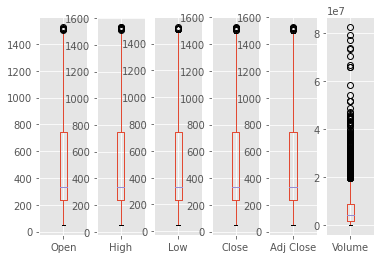

In [6]:
df.plot(kind = 'box', subplots = True, layout = (1,6), sharex = False, sharey = False)

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

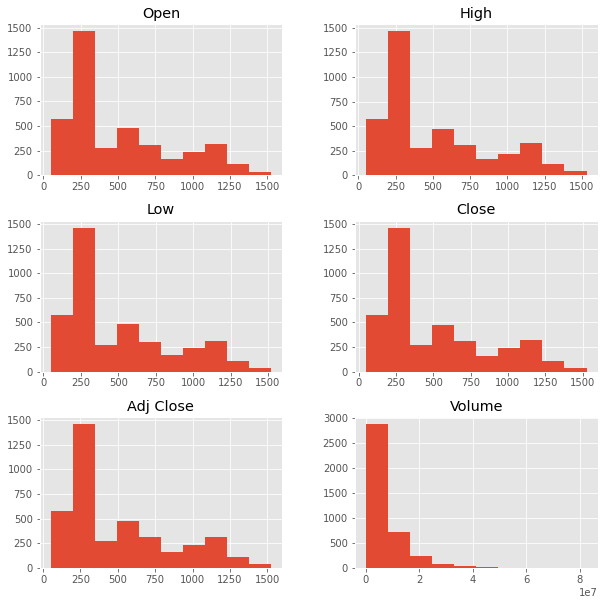

In [7]:
df.hist(figsize = (10,10))

In [8]:
# Percentage change in Open and Close Price 
df['OC_Change'] = (df['Close']-df['Open'])/df['Open']*100

In [9]:
# Percentage change in High and Low Price 
df['HL_Change'] = (df['High']-df['Low'])/df['Low']*100

In [10]:
df = df[['Close','HL_Change','OC_Change','Volume']]

In [11]:
print(df.tail()) 

                  Close  HL_Change  OC_Change   Volume
Date                                                  
2020-04-29  1341.479980   2.614425   0.001492  3793600
2020-04-30  1348.660034   2.293398   1.794882  2668900
2020-05-01  1320.609985   3.132719  -0.593904  2072500
2020-05-04  1326.800049   2.206315   1.419480  1504000
2020-05-05  1351.109985   2.727557   0.985854  1650700


In [12]:
forecast_Col = 'Close'
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_Col].shift(-forecast_out)
print(df['label'])

Date
2004-08-19    71.785927
2004-08-20    74.301498
2004-08-23    73.693779
2004-08-24    69.982689
2004-08-25    74.411087
                ...    
2020-04-29          NaN
2020-04-30          NaN
2020-05-01          NaN
2020-05-04          NaN
2020-05-05          NaN
Name: label, Length: 3955, dtype: float64


C:\Users\user\Desktop\StockMarketML-master\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df.tail()

,Close,HL_Change,OC_Change,Volume,label
Date,,,,,
2020-04-29,1341.479980,2.614425,0.001492,3793600,NaN
2020-04-30,1348.660034,2.293398,1.794882,2668900,NaN
2020-05-01,1320.609985,3.132719,-0.593904,2072500,NaN
2020-05-04,1326.800049,2.206315,1.419480,1504000,NaN
2020-05-05,1351.109985,2.727557,0.985854,1650700,NaN


In [14]:
df.dropna(inplace=True)
df.tail()

C:\Users\user\Desktop\StockMarketML-master\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,HL_Change,OC_Change,Volume,label
Date,,,,,
2020-03-03,1341.390015,5.867119,-4.146720,2402300,1341.479980
2020-03-04,1386.520020,3.348942,2.007757,1913300,1348.660034
2020-03-05,1319.040039,4.123060,-2.307800,2561300,1320.609985
2020-03-06,1298.410034,3.581929,1.671807,2660600,1326.800049
2020-03-09,1215.560059,4.563334,0.851241,3365400,1351.109985


### Data Splitting

In [15]:
X  =  np.array(df.drop(['label'], axis = 1))
Y  =  np.array(df['label'])

In [16]:
print(len(X),len(Y))

3915 3915


In [17]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size = 0.2)

In [18]:
np.shape(X_train)

(3132, 4)


# Linear Regression

In [19]:
startlr = time.time()

lr = LinearRegression()
lr.fit(X_train,Y_train)

endlr = time.time()

time_lr = endlr-startlr

print('Training Time :- {}'.format(time_lr))

Training Time :- 0.011377334594726562


In [20]:
accuracy = lr.score(X_test,Y_test)
print(accuracy)

0.9771309960610172


In [21]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = lr.predict(X_old)
print(Forecast_set)

[1305.35060584 1304.7977231  1316.64485178 1339.34561403 1326.8097262
 1322.0464451  1308.95152166 1307.48441339 1301.84287237 1312.91234612
 1320.07123361 1319.86510765 1312.41534462 1295.86092241 1300.75876763
 1325.42785248 1334.26642904 1346.43633583 1348.57585411 1350.48708773
 1351.74460715 1355.75539618 1353.76629172 1366.66270844 1360.71558364
 1358.64161294 1361.77155636 1354.3893778  1355.19480911 1350.69835667
 1365.69751096 1358.10915219 1342.38006291 1343.25743912 1370.91486041
 1364.91967983 1395.07312749 1398.656341   1408.29650323 1424.36444177]


C:\Users\user\Desktop\StockMarketML-master\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Desktop\StockMarketML-master\venv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


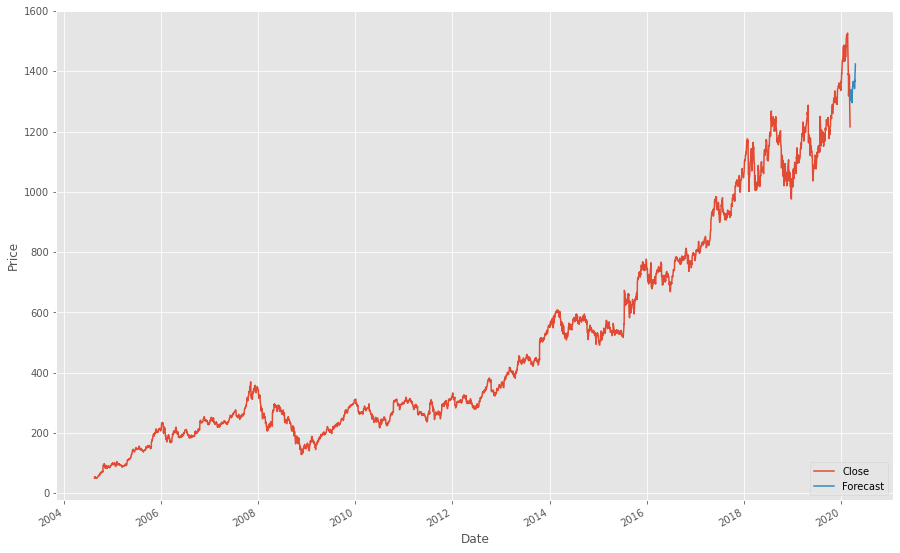

In [22]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in Forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Close'].plot(figsize = (15,10))
df['Forecast'].plot(figsize = (15,10))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Decision Tree

In [23]:
startdt = time.time()

tree = DecisionTreeRegressor(random_state = 0)
tree.fit(X_train, Y_train)

enddt = time.time()

time_dt = enddt-startdt

print('Training Time :- {}'.format(time_dt))

print('Accuracy:- {}'.format(tree.score(X_test, Y_test)))

Training Time :- 0.022685527801513672
Accuracy:- 0.9709185634118802


In [24]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = tree.predict(X_old)
print(Forecast_set)

[1298.800049 1298.       1311.459961 1334.869995 1085.349976 1138.849976
 1303.050049 1311.369995 1295.339966 1306.689941 1313.550049 1312.98999
 1304.959961 1289.920044 1295.280029 1025.76001  1328.130005 1340.619995
 1306.689941 1344.660034 1345.02002  1350.27002  1347.829956 1361.170044
 1355.119995 1352.619995 1348.839966 1138.819946 1348.839966 1343.560059
 1360.400024 1351.890015 1351.890015 1337.02002  1367.369995 1360.660034
 1394.209961 1393.339966 1404.319946 1419.829956]


# K-NN

In [25]:
startknn = time.time()

knn = KNeighborsRegressor(13)
knn.fit(X_train, Y_train)

endknn = time.time()

time_knn = endknn - startknn

print('Training Time:- {}'.format(time_knn))
print('Accuracy:- {}'.format(knn.score(X_test, Y_test)))

Training Time:- 0.00800633430480957
Accuracy:- 0.6945289335210874


In [26]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = knn.predict(X_old)
print(Forecast_set)

[ 885.84769385 1110.05384246  809.39698669  766.94867877  302.19842162
  740.30748108  845.02867254  934.04680223  822.40841915  812.26437138
  620.56540385  782.14039038  891.16922223 1051.24866662  983.22302731
 1163.66908615  931.04324115  831.64823092  842.79410969 1015.98229515
  956.82666492  920.61003454 1020.11961477 1026.09999892  766.66911677
  933.26777062 1050.34229923 1027.12645069 1114.82768846  894.76731269
  974.29614723 1023.15000562  932.89076585 1015.56538269  990.28413746
 1033.96538846  946.776926    934.04680223  885.84769385  974.12165246]


# Proposed Model Implementation

In [27]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Loading Dataset 


In [28]:
dfl = pd.read_csv('GOOG.csv',index_col="Date",parse_dates=True)
#Show the data
dfl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...
2020-04-29,1341.459961,1359.989990,1325.339966,1341.479980,1341.479980,3793600
2020-04-30,1324.880005,1352.819946,1322.489990,1348.660034,1348.660034,2668900
2020-05-01,1328.500000,1352.069946,1311.000000,1320.609985,1320.609985,2072500


In [29]:
#rows and columns in the data set
dfl.shape

(3955, 6)

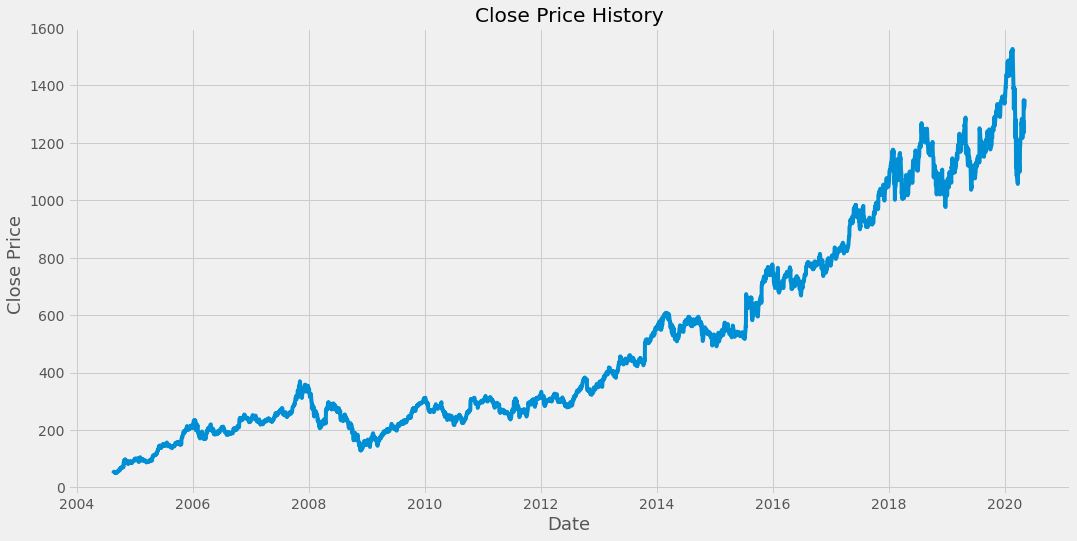

In [30]:
#Closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dfl['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.show()

In [31]:

#new dataframe with only the 'Close column
data = dfl.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

3164

In [32]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.11307572e-04],
       [2.79949983e-03],
       [3.16714518e-03],
       ...,
       [8.60461840e-01],
       [8.64653175e-01],
       [8.81113600e-01]])

In [33]:
#scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Splitting the data into x_train and y_train data sets
x_trainl = []
y_trainl = []

for i in range(60, len(train_data)):
    x_trainl.append(train_data[i-60:i, 0])
    y_trainl.append(train_data[i, 0])
    if i<= 61:
        print(x_trainl)
        print(y_trainl)
        print()

[array([1.11307572e-04, 2.79949983e-03, 3.16714518e-03, 1.63922502e-03,
       2.02036376e-03, 2.66458425e-03, 2.07095583e-03, 6.74577906e-04,
       7.96002809e-04, 8.09494841e-05, 5.05934276e-04, 0.00000000e+00,
       5.29544993e-04, 7.72392091e-04, 7.75765438e-04, 1.79437797e-03,
       2.52629803e-03, 3.87208117e-03, 4.04409815e-03, 4.70855872e-03,
       5.89581557e-03, 6.52654809e-03, 6.01386712e-03, 6.19600414e-03,
       7.01898898e-03, 6.68507168e-03, 6.15552940e-03, 9.05621676e-03,
       1.04795767e-02, 9.98038914e-03, 1.09855110e-02, 1.18219858e-02,
       1.29384126e-02, 1.25033138e-02, 1.31003129e-02, 1.27225495e-02,
       1.18894426e-02, 1.26112453e-02, 1.37917548e-02, 1.41627762e-02,
       1.48744535e-02, 1.65777640e-02, 1.61662732e-02, 1.36534686e-02,
       1.66519674e-02, 2.44264845e-02, 2.94757025e-02, 2.75868836e-02,
       2.89933816e-02, 3.14657108e-02, 3.05685205e-02, 3.23865099e-02,
       3.19952538e-02, 3.09159285e-02, 2.85650235e-02, 2.33876346e-02,
     

In [34]:
#Converting the split data to numpy arrays 
x_trainl, y_trainl = np.array(x_trainl), np.array(y_trainl)

In [35]:
#Reshaping the data
x_trainl = np.reshape(x_trainl, (x_trainl.shape[0], x_trainl.shape[1], 1))
x_trainl.shape

(3104, 60, 1)

## Building the proposed model architecture 

In [36]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape= (x_trainl.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [38]:
#Train the model
lstm_start = time.time()

history = model.fit(x_trainl, y_trainl, epochs=100, batch_size=32)
lstm_end = time.time()

total_lstm = lstm_end - lstm_start

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3104 samples
Epoch 1/100
3104/3104 [==============================] - 17s 5ms/sample - loss: 0.0036
Epoch 2/100
3104/3104 [==============================] - 11s 3ms/sample - loss: 9.3428e-05
Epoch 3/100
3104/3104 [==============================] - 15s 5ms/sample - loss: 9.3010e-05
Epoch 4/100
3104/3104 [==============================] - 14s 4ms/sample - loss: 8.4727e-05
Epoch 5/100
3104/3104 [==============================] - 11s 4ms/sample - loss: 9.9484e-05
Epoch 6/100
3104/3104 [==============================] - 14s 4ms/sample - loss: 8.5250e-05
Epoch 7/100
3104/3104 [==============================] - 9s 3ms/sample - loss: 8.7625e-05
Epoch 8/100
3104/3104 [==============================] - 13s 4ms/sample - loss: 7.9167e-05
Epoch 9/100
3104/3104 [==============================] - 15s 5ms/sample - loss: 7.4849e-05
Epoch 10/100
3104/3104 [==============================] - 14s 5ms/samp

3104/3104 [==============================] - 17s 6ms/sample - loss: 2.1242e-05
Epoch 87/100
3104/3104 [==============================] - 17s 5ms/sample - loss: 2.8382e-05
Epoch 88/100
3104/3104 [==============================] - 17s 5ms/sample - loss: 2.5199e-05
Epoch 89/100
3104/3104 [==============================] - 17s 6ms/sample - loss: 2.3701e-05
Epoch 90/100
3104/3104 [==============================] - 17s 6ms/sample - loss: 2.4059e-053s 
Epoch 91/100
3104/3104 [==============================] - 17s 5ms/sample - loss: 2.4623e-05
Epoch 92/100
3104/3104 [==============================] - 16s 5ms/sample - loss: 2.8246e-05
Epoch 93/100
3104/3104 [==============================] - 15s 5ms/sample - loss: 2.6662e-05
Epoch 94/100
3104/3104 [==============================] - 17s 5ms/sample - loss: 2.9003e-05
Epoch 95/100
3104/3104 [==============================] - 17s 5ms/sample - loss: 2.3291e-05
Epoch 96/100
3104/3104 [==============================] - 17s 5ms/sample - loss: 2.2151e-0

In [39]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_testl = []
y_testl = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_testl.append(test_data[i-60:i, 0])

In [40]:
#Convert the data to a numpy array
x_testl = np.array(x_testl)

In [41]:
#Reshape the data
x_testl = np.reshape(x_testl, (x_testl.shape[0], x_testl.shape[1], 1 ))

In [42]:
#Get the models predicted price values 
predictionsl = model.predict(x_testl)
predictionsl = scaler.inverse_transform(predictionsl)

In [43]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictionsl - y_testl)**2)))
rmse

29.75746563464962

### Visualizing Results 

C:\Users\user\Desktop\StockMarketML-master\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


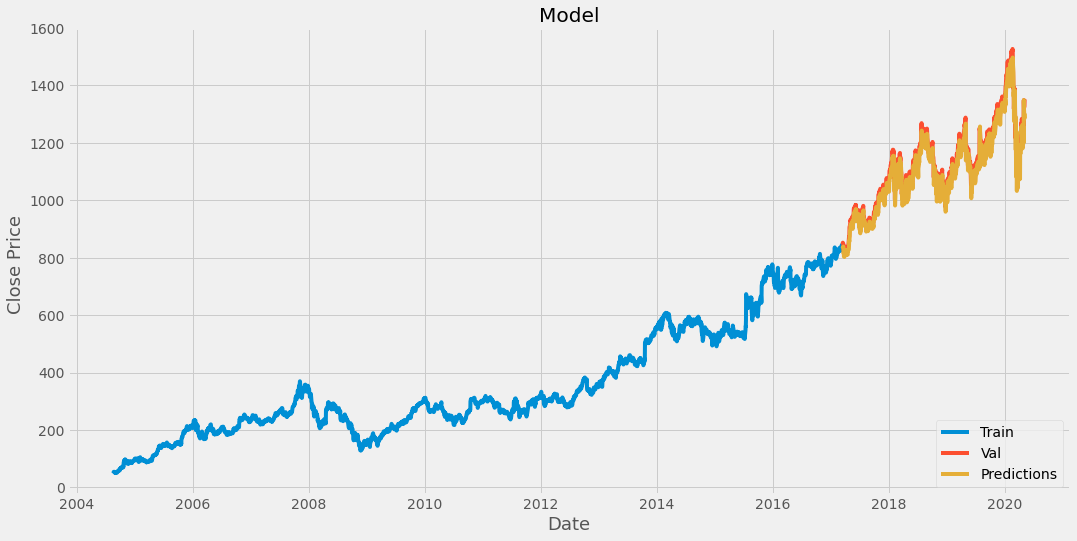

In [44]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictionsl
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [45]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2017-03-15,847.200012,831.550720
2017-03-16,848.780029,833.385376
2017-03-17,852.119995,834.992859
2017-03-20,848.400024,838.573425
2017-03-21,830.460022,833.873962
...,...,...
2020-04-29,1341.479980,1199.118286
2020-04-30,1348.660034,1348.618408
2020-05-01,1320.609985,1316.616089


In [46]:
lstm_temp_pred = valid[['Predictions']].tail(40)
lstm_temp_ori = valid[['Close']].tail(40)

In [47]:
lstm_temp_pred.reset_index(drop=True, inplace=True)
lstm_temp_ori.reset_index(drop=True, inplace=True)

In [48]:
lstm_temp_pred = lstm_temp_pred.values.tolist()
lstm_temp_ori = lstm_temp_ori.values.tolist()

In [49]:
lstm = []
original = []
for i in range(40):
    lstm.append(lstm_temp_pred[i][-1])
    original.append(lstm_temp_ori[i][-1])

### Comparing Result with other models

In [50]:
days = [int(i) for i in range(39)]

predictions = {'Original':original,
               'Linear Regression':lr.predict(X_old),
              'KNN':knn.predict(X_old),
              'Decision Tree':tree.predict(X_old),
              'LSTM':lstm}

predictions = pd.DataFrame(predictions)

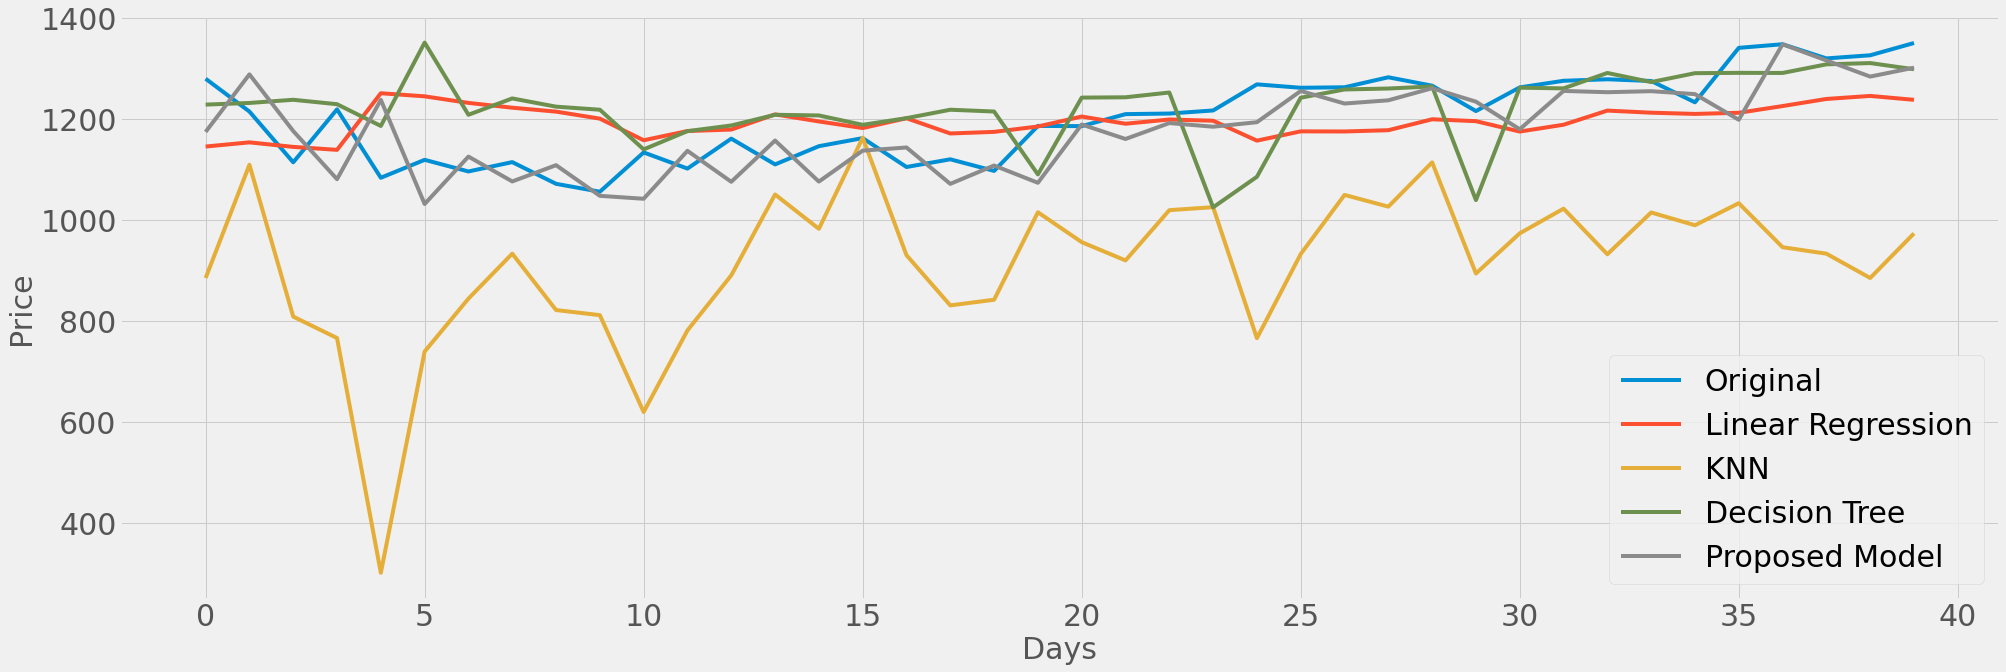

In [51]:
predictions['Original'].plot(figsize = (30,10), fontsize = 30)
predictions['Linear Regression'].plot(figsize = (30,10), fontsize = 30)
predictions['KNN'].plot(figsize = (30,10), fontsize = 30)
predictions['Decision Tree'].plot(figsize = (30,10), fontsize = 30)
predictions['LSTM'].plot(figsize = (30,10), fontsize = 30)
plt.legend(['Original','Linear Regression', 'KNN', 'Decision Tree', 'Proposed Model'], fontsize=30)
plt.xlabel('Days', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.savefig("temp.png", transparent=True)
plt.show()